# Twitter US Airline Sentiment Analysis

### Load Data

In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('twitter_x_y_train.csv')
test = pd.read_csv('twitter_x_test.csv')
print("Tweets in training data:{}".format(train.shape[0]))
print("Tweets in testing data:{}".format(test.shape[0]))
print("Total Tweets --> ",train.shape[0]+test.shape[0])

Tweets in training data:10980
Tweets in testing data:3660
Total Tweets -->  14640


In [3]:
#print(train.info())

In [4]:
#train.head(5)

In [5]:
train.columns

Index(['tweet_id', 'airline_sentiment', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_location', 'user_timezone'],
      dtype='object')

# Plot the Graph to visualize the airline_sentiments

In [6]:
print(train.airline_sentiment.value_counts())

negative    6851
neutral     2327
positive    1802
Name: airline_sentiment, dtype: int64


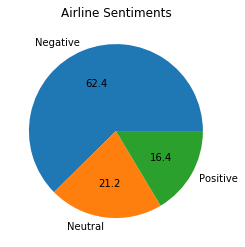

In [7]:
plt.title("Airline Sentiments")
labels = ['Negative','Neutral','Positive']
sizes = [6851,2327,1802]
plt.pie(sizes,labels=labels,autopct='%.1f')
plt.show()

# Number of Tweets Per airline

In [8]:
train['airline'].value_counts()

United            2928
US Airways        2152
American          2078
Southwest         1817
Delta             1639
Virgin America     366
Name: airline, dtype: int64

# Plot the Pie - Graph to visualize the Number of Tweets per Airline

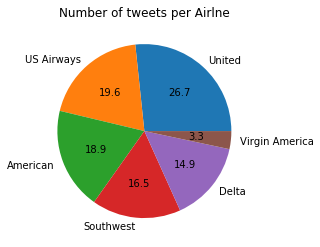

In [9]:
plt.title("Number of tweets per Airlne")
labels = ['United','US Airways','American','Southwest','Delta','Virgin America']
sizes = [2928,2152,2078,1817,1639,366]
plt.pie(sizes,labels=labels,autopct='%.1f')
plt.show()

# Clean data

In [10]:
drop_cols = ['tweet_id', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count','tweet_coord',
       'tweet_created', 'tweet_location', 'user_timezone']
train.drop(drop_cols, axis = 1, inplace=True)
test.drop(drop_cols, axis = 1, inplace=True)

In [11]:
train

,airline_sentiment,text
0,negative,"@SouthwestAir I am scheduled for the morning, ..."
1,positive,@SouthwestAir seeing your workers time in and ...
2,positive,@united Flew ORD to Miami and back and had gr...
3,negative,@SouthwestAir @dultch97 that's horse radish 😤🐴
4,negative,@united so our flight into ORD was delayed bec...
...,...,...
10975,neutral,@AmericanAir followback
10976,positive,@united thanks for the help. Wish the phone re...
10977,negative,@usairways the. Worst. Ever. #dca #customerser...
10978,negative,@nrhodes85: look! Another apology. DO NOT FLY ...


In [12]:
train_data = (train["text"])
target_data = set(train['airline_sentiment'])
test_data = (test["text"])

In [13]:
tweets_train = []
tweets_test = []
for sentiment in target_data:
    
    #---->Training data (text,sentiment)
    sentiment_rows_train = (train['airline_sentiment'] == sentiment)
    current_train=train[sentiment_rows_train]
    current_train.reset_index(drop=True,inplace=True)
    for tweet in (list(current_train['text'])):
        tweets_train.append(((word_tokenize(tweet)), sentiment))    
    
#---->Testing data (text)
for j in test_data:
    tweets_test.append((word_tokenize(j)))

In [14]:
print(len(tweets_train))
print(len(tweets_test))

10980
3660


In [15]:
#tweets_train[:5]
#tweets_test[:5]

In [16]:
import random
random.shuffle(tweets_train)
#tweets_train[0:5]

### WordNetLemmatizer and Pos Tag

In [17]:
lemmatizer = WordNetLemmatizer()

In [18]:
def get_simple_pos(tag):
    
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [19]:
stops = set(stopwords.words('english'))
punctuations = list(string.punctuation)

stops.update(punctuations)
#stops

In [20]:
def get_clean_words(words):
    output_words = []
    for w in words:
        if w.lower() not in stops:
            pos = pos_tag([w])
            clean_word = lemmatizer.lemmatize(w, pos = get_simple_pos(pos[0][1]))
            output_words.append(clean_word.lower())
    return output_words

In [21]:
tweets_train = [(get_clean_words(tweet),sentiment) for tweet,sentiment in tweets_train]
len(tweets_train)

10980

In [22]:
tweets_test = [get_clean_words(tweet) for tweet in tweets_test]
len(tweets_test)

3660

# Convert data in X(2d array) and Y(Target) format

In [23]:
text_tweet = [" ".join(tweet) for tweet, category in tweets_train]

In [24]:
sentiments = [sentiment for tweet, sentiment in tweets_train]

In [25]:
text_tweet_test = [" ".join(tweet) for tweet in tweets_test]

# Train_Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# default 75:25
x_train, x_test, y_train, y_test = train_test_split(text_tweet, sentiments)

# CountVectorizer

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
count_vec = CountVectorizer(max_features = 2000, ngram_range=(1,2))
x_train_features = count_vec.fit_transform(x_train)
x_train_features.todense()   

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [30]:
#count_vec.get_feature_names()

In [31]:
x_test_features = count_vec.transform(x_test)

In [32]:
x_test_features

<2745x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 26576 stored elements in Compressed Sparse Row format>

In [33]:
test_tweet = count_vec.transform(text_tweet_test)

# sklearn Logistic Regression 

In [34]:
from sklearn.linear_model import LogisticRegression
Logistic_R = LogisticRegression(max_iter=40000)

In [35]:
Logistic_R.fit(x_train_features,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=40000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
print("Training accuracy:",Logistic_R.score(x_train_features, y_train))

Training accuracy: 0.8924104432301153


In [37]:
print("Testing accuracy:",Logistic_R.score(x_test_features, y_test))

Testing accuracy: 0.7635701275045538


In [38]:
Sentiment = Logistic_R.predict(test_tweet)
len(Sentiment)

3660

In [39]:
#np.savetxt('SentimentSVM.csv',Sentiment,fmt="%s")

# sklearn Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [41]:
model = GaussianNB()

# fit the model with the training data
model.fit(x_train_features.todense(), y_train)

# predict the target on the train dataset
predict_train = model.predict(x_train_features.todense())
#print('Target on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(x_test_features.todense())
#print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on train dataset :  0.5523982999392836
accuracy_score on test dataset :  0.46120218579234973


# sklearn Support Vector Classifier (SVC)

In [42]:
from sklearn.svm import SVC

In [43]:
svc = SVC(kernel='rbf',C=100,gamma=0.0001)
svc.fit(x_train_features, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
print("Training accuracy:",svc.score(x_train_features, y_train))

Training accuracy: 0.7384335154826958


In [45]:
print("Testing accuracy:",svc.score(x_test_features, y_test))

Testing accuracy: 0.7125683060109289


# sklearn Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
clf = RandomForestClassifier(n_estimators=10,min_samples_split=5)

In [48]:
clf.fit(x_train_features,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
print("Training accuracy:",clf.score(x_train_features, y_train))

Training accuracy: 0.9598057073466909


In [50]:
print("Testing accuracy:",clf.score(x_test_features, y_test))

Testing accuracy: 0.7311475409836066


# Predict twitter_x_test (text_tweet_test)

In [51]:
test_pred = clf.predict(test_tweet)    # Random Forest

In [52]:
df = pd.DataFrame(test_pred)
#df.to_csv('twitter_randomforest_pred.csv',header=False,index=False)